In [22]:
#Det här projektet är ett analysprojekt som jag gjort av min masteruppsats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data=pd.read_csv(r'E:\Masterprogrammet\Termin 4\Masteruppsats\Datasets\marcus_Q1.csv', sep=';')

In [4]:
data

,ProlificID,Age,Gender_Birth,GenderIdentity,Ethnicity,Handedness,Education,ASD_diagnosis,hasASD,hasADHD,...,hasSocAnx,hasPhobia,hasOCD,hasAdjDis,hasEatDis,hasPersDis,CATI_total,IHS_total,DMQ_Symptoms_total,Phonophobia
0,5658fbd07d69570005dfe196,36,Female,Female,White,Right-handed,Associate degree,No,0,0,...,0,0,0,0,0,0,92,16,1,0
1,570521cfde5095001018a0c8,52,Male,Male,White,Right-handed,Bachelor degree,Suspected,0,0,...,0,0,0,0,0,0,101,0,0,0
2,576311d7151e5d000889e2e7,50,Male,Male,Multple,Right-handed,Some college but no degree,No,0,0,...,0,0,0,0,0,0,113,16,18,10
3,58016c9f551314000145af58,30,Female,Female,White,Right-handed,Associate degree,Yes,1,0,...,1,0,0,1,0,0,172,32,39,28
4,583ec287ad2f4300014b355a,66,Male,Male,White,Right-handed,Bachelor degree,No,0,0,...,1,0,0,0,0,0,137,50,32,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,63d3fbb451ad7ba5c2f30246,23,Male,Male,Black,Right-handed,High school degree or equivalent,No,0,0,...,0,0,0,0,0,0,77,9,3,1
80,63d5bb0d1cc3800ad1e343dc,18,Unknown,Male,White,Right-handed,Some college but no degree,Yes,1,0,...,0,0,0,0,0,0,183,40,34,16
81,63e576170eb086a90644efb4,36,Male,NB,Asian,Right-handed,Graduate degree,Yes,1,0,...,1,0,0,0,0,0,159,5,0,0
82,63e630188c3e4ac4a92b1ff5,47,Male,Male,White,Right-handed,Bachelor degree,No,0,0,...,0,0,0,0,0,0,57,7,0,1


In [16]:
data.dtypes

ProlificID            object
Age                    int64
Gender_Birth          object
GenderIdentity        object
Ethnicity             object
Handedness            object
Education             object
ASD_diagnosis         object
hasASD                 int64
hasADHD                int64
hasDCD                 int64
hasSLD                 int64
hasComm                int64
hasTic                 int64
hasID                  int64
hasMood                int64
hasGAD                 int64
hasSocAnx              int64
hasPhobia              int64
hasOCD                 int64
hasAdjDis              int64
hasEatDis              int64
hasPersDis             int64
CATI_total             int64
IHS_total              int64
DMQ_Symptoms_total     int64
Phonophobia            int64
dtype: object

In [17]:
data.memory_usage(deep=True)

Index                  128
ProlificID            6804
Age                    672
Gender_Birth          5199
GenderIdentity        5176
Ethnicity             5224
Handedness            5806
Education             6396
ASD_diagnosis         5035
hasASD                 672
hasADHD                672
hasDCD                 672
hasSLD                 672
hasComm                672
hasTic                 672
hasID                  672
hasMood                672
hasGAD                 672
hasSocAnx              672
hasPhobia              672
hasOCD                 672
hasAdjDis              672
hasEatDis              672
hasPersDis             672
CATI_total             672
IHS_total              672
DMQ_Symptoms_total     672
Phonophobia            672
dtype: int64

### Deskriptiv statistik

In [8]:
t=data.iloc[:,23:28]
print(t)

    CATI_total  IHS_total  DMQ_Symptoms_total  Phonophobia
0           92         16                   1            0
1          101          0                   0            0
2          113         16                  18           10
3          172         32                  39           28
4          137         50                  32           18
..         ...        ...                 ...          ...
79          77          9                   3            1
80         183         40                  34           16
81         159          5                   0            0
82          57          7                   0            1
83         176         31                  30           11

[84 rows x 4 columns]


In [19]:
print(t.describe())

       CATI_total  IHS_total  DMQ_Symptoms_total  Phonophobia
count   84.000000  84.000000           84.000000    84.000000
mean   117.714286  20.428571           16.261905     5.047619
std     37.478852  16.469238           18.072891     7.323678
min     49.000000   0.000000            0.000000     0.000000
25%     86.750000   7.750000            0.000000     0.000000
50%    114.000000  18.000000           11.500000     2.000000
75%    144.000000  30.000000           29.250000     8.000000
max    193.000000  70.000000           67.000000    36.000000


In [24]:
t.value_counts

<bound method DataFrame.value_counts of     CATI_total  IHS_total  DMQ_Symptoms_total  Phonophobia
0           92         16                   1            0
1          101          0                   0            0
2          113         16                  18           10
3          172         32                  39           28
4          137         50                  32           18
..         ...        ...                 ...          ...
79          77          9                   3            1
80         183         40                  34           16
81         159          5                   0            0
82          57          7                   0            1
83         176         31                  30           11

[84 rows x 4 columns]>

### Korrelationsgraf: Hyperakusi

In [9]:
#Tar fram korrelationerna mellan autism och de olika typerna av ljudkänslighet
t.corr()

,CATI_total,IHS_total,DMQ_Symptoms_total,Phonophobia
CATI_total,1.000000,0.685930,0.481167,0.584018
IHS_total,0.685930,1.000000,0.764251,0.764681
DMQ_Symptoms_total,0.481167,0.764251,1.000000,0.763703
Phonophobia,0.584018,0.764681,0.763703,1.000000


In [12]:
reg=np.polyfit(x=data['IHS_total'], y=data['CATI_total'], deg=1)
reg

array([ 1.56096276, 85.8260464 ])

In [13]:
trend=np.polyval(reg, data['IHS_total'])

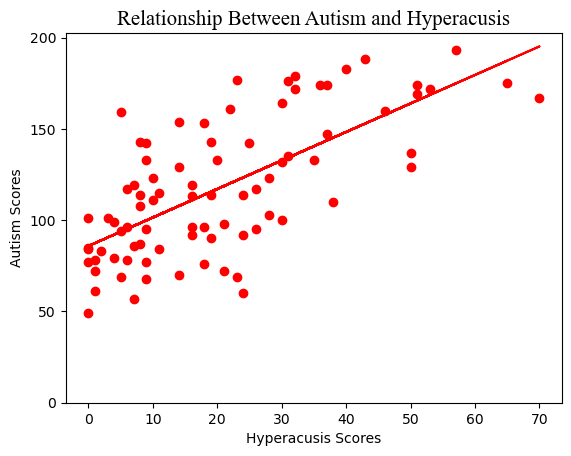

In [15]:
#Skapar spridningsdiagrammet för autism och hyperakusi
plt.scatter(x=data['IHS_total'],y=data['CATI_total'], c='r')
plt.plot(data['IHS_total'], trend, 'r')

#Bestämmer namnen på x och y axlarna
plt.title('Relationship Between Autism and Hyperacusis', fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Autism Scores')
plt.xlabel('Hyperacusis Scores')

#Bestämmer intervallet på y-axeln
plt.yticks([0,50,100,150,200])
plt.show()

### Korrelationsgraf: Misofoni

In [16]:
reg2=np.polyfit(x=data['DMQ_Symptoms_total'], y=data['CATI_total'], deg=1)

In [17]:
trend2=np.polyval(reg2, data['DMQ_Symptoms_total'])

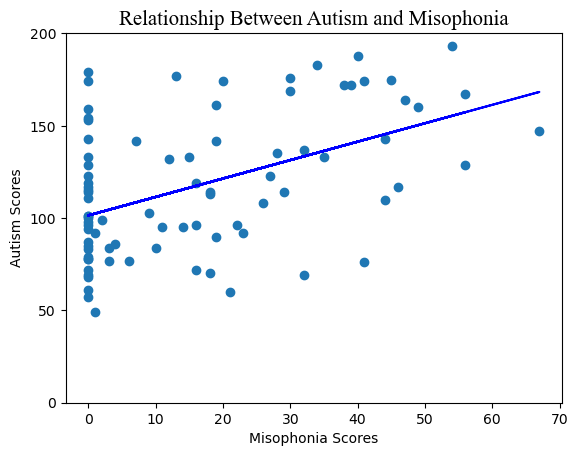

In [18]:
plt.scatter(x=data['DMQ_Symptoms_total'],y=data['CATI_total'])
plt.plot(data['DMQ_Symptoms_total'], trend2, 'b')

plt.title('Relationship Between Autism and Misophonia', fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Autism Scores')
plt.xlabel('Misophonia Scores')

plt.yticks([0,50,100,150,200])
plt.show()

In [19]:
reg3=np.polyfit(x=data['Phonophobia'], y=data['CATI_total'], deg=1)

In [20]:
trend3=np.polyval(reg3, data['Phonophobia'])

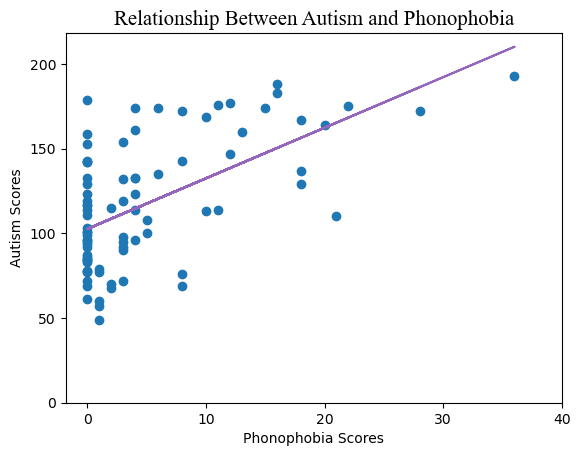

In [21]:
plt.scatter(x=data['Phonophobia'],y=data['CATI_total'])
plt.plot(data['Phonophobia'], trend3, '#9467bd')

plt.title('Relationship Between Autism and Phonophobia', fontdict={'fontname': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Autism Scores')
plt.xlabel('Phonophobia Scores')

plt.xticks([0,10,20,30,40])
plt.yticks([0,50,100,150,200])
plt.show()

### Regressionsanalyserna

In [25]:
#skapar en till regressionsvariabel
reg1_analysis='CATI_total~IHS_total+Age'

In [26]:
reg1output=smf.ols(reg1_analysis,data).fit()
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:             CATI_total   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     41.08
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.82e-13
Time:                        14:49:50   Log-Likelihood:                -393.67
No. Observations:                  84   AIC:                             793.3
Df Residuals:                      81   BIC:                             800.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.4135     11.572      9.542      0.0

In [28]:
reg2_analysis='CATI_total~DMQ_Symptoms_total+Age'

In [29]:
reg2output=smf.ols(reg2_analysis,data).fit()
print(reg2output.summary())

                            OLS Regression Results                            
Dep. Variable:             CATI_total   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     18.31
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.74e-07
Time:                        14:53:26   Log-Likelihood:                -407.42
No. Observations:                  84   AIC:                             820.8
Df Residuals:                      81   BIC:                             828.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            136.8848     12

In [30]:
reg3_analysis='CATI_total~Phonophobia+Age'

In [31]:
reg3output=smf.ols(reg3_analysis,data).fit()
print(reg3output.summary())

                            OLS Regression Results                            
Dep. Variable:             CATI_total   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     25.88
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.04e-09
Time:                        14:54:30   Log-Likelihood:                -402.33
No. Observations:                  84   AIC:                             810.7
Df Residuals:                      81   BIC:                             818.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     130.9787     11.810     11.090      